In [4]:
import os 
import pandas as pd
from uszipcode import ZipcodeSearchEngine
search = ZipcodeSearchEngine()
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')

city_path = os.path.join('..','data','311_cleaned_data_.csv')
city311_df = pd.read_csv(city_path)

lat_long_df = city311_df[['lat','long','address']]
lat_long_df.head()

## Adding a Column for Zip Code and Population to Data Frame

lat_long_df['zip_code'] = ""
lat_long_df['population'] = ""
lat_long_df.head()

## Getting a Zip Code and Population for Eand Latitude and Longitude

# counter = 0

# for index,row in lat_long_df.iterrows() :
#     counter += 1
#     if counter % 1000 == 0:
#         print(counter)    
    
#     lat = row['lat']
#     lng = row['long']
#     try:
#         coordinate_data = search.by_coordinate(lat,lng, radius=5)
#         coordinate_zip_code = coordinate_data[0]['Zipcode']
#         coordinate_pop = coordinate_data[0]['Population']
#         lat_long_df.loc[index,'zip_code'] = coordinate_zip_code
#         lat_long_df.loc[index,'population'] = coordinate_pop
#     except IndexError:
#         continue

# lat_long_df.to_csv(os.path.join('..','..','data','zip_code_population.csv'))

lat_long_path = os.path.join('..','data','zip_code_population.csv')
lat_long_df = pd.read_csv(lat_long_path)
lat_long_df.head()

zip_path = os.path.join('..','data','census_income_by_zip.csv')
zip_df = pd.read_csv(zip_path)

zip_code_list = []
for code in zip_df['zip_code']:
    zip_code_list.append(str(code))
print(zip_code_list)
len(zip_code_list)

## Adding Zip Code and Population to Main Data Frame

city311_df['zip_code'] = lat_long_df['zip_code']
# city311_df['population'] = lat_long_df['population']

city311_df.head()

# city311_df.to_csv(os.path.join('..','..','data','city311_zip_code.csv'))

san_diego_311_df = city311_df[city311_df.zip_code.isin(zip_code_list)]

san_diego_311_df.reset_index(inplace=True,drop=True)
san_diego_311_df.head()

san_diego_311_df.count()

# san_diego_311_df.to_csv(os.path.join('..','..','data','clean_san_diego_zip_code.csv'))

zip_pop_path = os.path.join('..','data','census_population_by_zip.csv')
zip_pop_df = pd.read_csv(zip_pop_path)

zip_pop_df = zip_pop_df[zip_pop_df.zip_code.isin(zip_code_list)]

zip_pop_df.reset_index(inplace=True,drop=True)
zip_pop_df

# zip_pop_df.to_csv(os.path.join('..','..','data','census_population_by_zip.csv'))

san_diego_311_df = pd.merge(zip_pop_df,san_diego_311_df,how="outer",on='zip_code')
san_diego_311_df

san_diego_311_df = pd.merge(zip_df,san_diego_311_df,how="outer",on='zip_code')
san_diego_311_df

# san_diego_311_df.to_csv(os.path.join('..','..','data','final_311.csv'),index=False)







['91911', '91914', '91915', '91932', '91942', '91945', '91950', '92014', '92025', '92027', '92029', '92037', '92064', '92065', '92067', '92071', '92075', '92101', '92102', '92103', '92104', '92105', '92106', '92107', '92108', '92109', '92110', '92111', '92113', '92114', '92115', '92116', '92117', '92118', '92119', '92120', '92121', '92122', '92123', '92124', '92126', '92127', '92128', '92129', '92130', '92131', '92139', '92145', '92154', '92173']


,zip_code,Mean income,MoE Mean income,Median income,MoE Median income,Unnamed: 0,total population,service_request_id,status_description,mobile_web_status,...,sap_problem_type,address,case_record_type,district,date,time,weekday,year,month,day
0,91911,62932,2137,51383,1874,0,84241,"384,120.00",New,New,...,NaN,"468 Marsh Harbor Dr, San Diego, CA 92154, USA",Parking,8.00,2018-07-29,12:01:00,Sunday,"2,018.00",7.00,29.00
1,91911,62932,2137,51383,1874,0,84241,"371,242.00",Assigned,In Process,...,NaN,"3661 Palm Ave, San Diego, CA 92154, USA",Street Division,8.00,2018-07-28,21:16:00,Saturday,"2,018.00",7.00,28.00
2,91911,62932,2137,51383,1874,0,84241,"370,923.00",Acknowledged,In Process,...,NaN,5192 TOPSIDE LANE,Street Division,8.00,2018-07-27,09:35:00,Friday,"2,018.00",7.00,27.00
3,91911,62932,2137,51383,1874,0,84241,"370,790.00",Duplicate,In Process,...,NaN,"2758 AGNO CT, 92154",Storm Water Code Enforcement,8.00,2018-07-26,12:05:00,Thursday,"2,018.00",7.00,26.00
4,91911,62932,2137,51383,1874,0,84241,"370,789.00",Duplicate,In Process,...,NaN,"2758 AGNO CT, 92154",Storm Water Code Enforcement,8.00,2018-07-26,12:05:00,Thursday,"2,018.00",7.00,26.00
5,91911,62932,2137,51383,1874,0,84241,"370,788.00",New,New,...,NaN,"2758 AGNO CT, 92154",Storm Water Code Enforcement,8.00,2018-07-26,12:05:00,Thursday,"2,018.00",7.00,26.00
6,91911,62932,2137,51383,1874,0,84241,"370,653.00",New,New,...,NaN,"506 Sea Isle Drive, San Diego, CA, USA",72 Hour Report,8.00,2018-07-25,17:12:00,Wednesday,"2,018.00",7.00,25.00
7,91911,62932,2137,51383,1874,0,84241,"369,915.00",Closed - Referred,Referred,...,NaN,3020 Coronado Ave,Street Division Closed Case,8.00,2018-07-24,14:47:00,Tuesday,"2,018.00",7.00,24.00
8,91911,62932,2137,51383,1874,0,84241,"369,830.00",Closed,Closed,...,NaN,"PALM AVE & NORSTAD AV,, 92154",Street Division Closed Case,8.00,2018-07-24,13:35:00,Tuesday,"2,018.00",7.00,24.00
9,91911,62932,2137,51383,1874,0,84241,"369,338.00",New,New,...,NaN,"4445 Murrieta Cir, San Diego, CA 92154, USA",72 Hour Report,8.00,2018-07-23,18:19:00,Monday,"2,018.00",7.00,23.00


In [15]:
latlng = lat_long_df.drop(['Unnamed: 0', 'address'], axis='columns')

In [3]:
import os
import gmaps
import datetime
import numpy as np
import regex as reg
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

pd.options.display.float_format = '{:,.2f}'.format

plt.style.use('fivethirtyeight')


path_311 = os.path.join('..', 'data', 'final_311.csv')
df = pd.read_csv(path_311)
df.dropna(inplace=True)

### Number of 311 calls by month
# calls from 2017-03-11 to 2018-03-10

period_311 = df[df['date'] > '2017-03-10']
period_311 = period_311[period_311['date'] < '2018-03-11']
months = period_311.groupby('month', as_index=False)['service_request_id'].count()
months['month'] = months['month'].map(lambda x: datetime.date(1900, int(x), 1).strftime('%B'))

plt.figure(figsize=[16, 8])
plt.bar(months['month'], months['service_request_id'], align='center')
plt.title('Number of Service Calls per Month')
plt.xlabel('Months')
plt.ylabel('Number of Service Calls')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# # plt.savefig(os.path.join('..', 'figures', 'calls_per_month_bar.png'))

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', ]
weekdays = df.groupby('weekday', as_index=False)['service_request_id'].count()
weekdays['day_order'] = weekdays['weekday'].map(lambda x: days.index(x))
weekdays.sort_values('day_order', inplace=True)

plt.figure(figsize=[16, 8])
plt.bar(weekdays['weekday'], weekdays['service_request_id'], align='center')
plt.title('Calls by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Calls')
plt.tight_layout()
# plt.savefig(os.path.join('..', 'figures', 'calls_by_day_bar.png'))

zip_service = df.groupby('zip_code')['service_request_id'].count().sort_values(ascending=False)
service = zip_service[zip_service > 0]

fig, ax = plt.subplots(figsize=[16, 8])
zip_service_plt = zip_service.plot(kind='bar', color='green',alpha =0.75)
plt.xlabel('Zip Code')
plt.ylabel('Number of Service Calls')
plt.title('Number of 311 Call by Zip Code')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
# plt.savefig(os.path.join('..','figures','number_of_311_call_by_zip_code.png'))

coordinates= df.groupby('zip_code')[['lat','long']].mean().dropna()

# from config import gkey
# gmaps.configure(api_key=gkey)
# heat_map = gmaps.heatmap_layer(coordinates,weights=service,point_radius=80,opacity=.5)
# fig = gmaps.figure()
# fig.add_layer(heat_map)
# fig

service = df.groupby('service_subtype')['service_request_id'].count().sort_values().tail(20)
fig, ax = plt.subplots(figsize=[16, 8])
service.plot.bar()
plt.title('Number of Calls Sub Categories')
plt.xlabel('Service Type')
plt.ylabel('Number of Calls by Categorty')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
# plt.savefig(os.path.join('..','figures','number_of_311_call_by_category_bar.png'))

pop_path = os.path.join('..', 'data', 'census_population_by_zip.csv')
pop_df = pd.read_csv(pop_path)
pop_df.head()

income_path = os.path.join('..', 'data', 'census_income_by_zip.csv')
income_df = pd.read_csv(income_path)

pop_income_df = pop_df.merge(income_df, on='zip_code', how='right')

zip_gp = df.groupby('zip_code', as_index=False)
med_income = zip_gp['Median income'].mean()
zip_calls = zip_gp['service_request_id'].count()
total_pop = zip_gp['total population'].first()

med_income['Median income'].describe()

calls_income = med_income.merge(zip_calls, on='zip_code', how='outer')
calls_income = calls_income.merge(total_pop, on='zip_code', how='outer')

bins = [0, 35000, 55000, 75000, 95000, 115000, 999999999]
bin_names = ['<$35,000', '\$35,001-\$55,000', '\$55,001-\$75,000', '\$75,001-\$95,000', '\$95,001-\$115,000', '>$115,000']
calls_income['income_ranges'] = pd.cut(x=calls_income['Median income'], bins=bins, labels=bin_names)
calls_income_gp = calls_income.groupby(by='income_ranges', as_index=False)
call_count = calls_income_gp['service_request_id'].sum()
total_pop_per_range = calls_income_gp['total population'].sum()
call_count['total population'] = total_pop_per_range['total population']
call_count['caller percentage'] = (call_count['service_request_id'] / call_count['total population']) * 100

plt.figure(figsize=[16, 8])
plt.bar(call_count['income_ranges'], call_count['caller percentage'])
plt.xticks()
plt.title('Percentage of 311 Calls Per Capita in Income Range')
plt.xlabel('Income')
plt.ylabel('Percentage')
plt.tight_layout()
# plt.savefig(os.path.join('..', 'figures', 'percentage_per_capita_income_bar.png'))

owm_path = os.path.join('..', 'data', 'owm_2016_2018.csv')
temp_df = pd.read_csv(owm_path)
temp_df['date'] = temp_df['dt_iso'].map(lambda x: reg.sub('\s\d{2}:\d{2}:\d{2}\s\+\d{4}\sUTC', '', x))
temp_df = temp_df[temp_df['date'] > '2017-03-10']
temp_df = temp_df[temp_df['date'] < '2018-03-11']
temp_df = temp_df.groupby('date', as_index=False).mean()

date_311 = period_311.groupby('date', as_index=False).count()

plt.figure(figsize=[16, 8])
plt.scatter(date_311['service_request_id'], temp_df['temp_f'])
plt.title('Call Frequency by Temperature')
plt.xlabel('Number of Calls')
plt.ylabel('Temperature in Fahrenheit')
plt.tight_layout()
# plt.savefig(os.path.join('..', 'figures', 'calls_by_temp_scatter.png'))

In [5]:
from scipy.stats import linregress


# 311 San Diego
### Alan Cecil - Farhad Omidvar - Brent Giesbrecht - Garrett Cookson
---

## Project Description:
In this project we use the 311-call data from the City of San Diego to determine what are the major concerns of residents of San Diego, what zip codes have the most 311 requests, what source was used the most to submit request, if the month, day of the week and temperature affect the number of requests, and determine if there is any relation between the number of 311 calls per population, income bracket.
## Hypothesis:
Middle of the week would be more complaint
With higher temperature would be more complaint
With higher income would be more complaint
Number of service requests increase by population

## Data Sources Used:
* 311 call data from City of San Diego
* income and population per zip code data form US Census of Bureau
* Historical weather Data from OpenWeatherMap

## Data Cleaning:
* Pandas to remove unnecessary data from initial .csv file 
* Regex to separate the date data and put it the different columns
* uszipcode library to retrieve zip code for each latitude Longitude Removing invalid zip codes

## Challenges:
* Finding relevant data from US Census Bureau
* Retrieving zip codes with Latitude and Longitude for each service requests
* Finding the valid zip code reference for City of San Diego
* Combining data from different sources in a correct way 

## To do our analysis we used:
* Bar Chart 
* Pie Chart 
* Scatter Plot
* Heatmap
* Linear Regression

## Importing the Data
---

In [20]:
city_path = os.path.join('..','data','311_cleaned_data_.csv')
city311_df = pd.read_csv(city_path)
city311_df[['lat','long','address']].head()

,lat,long,address
0,32.783734,-117.202187,"2121 Frankfort St, San Diego, CA 92110, USA"
1,32.743110,-117.210460,"2790 Lytton St, San Diego, CA 92110, USA"
2,32.714120,-117.121590,"208 19th St, San Diego, CA 92102, USA"
3,32.707370,-117.146590,"207 19th St, San Diego, CA 92102, USA"
4,32.584330,-117.027900,"468 Marsh Harbor Dr, San Diego, CA 92154, USA"


## Cleaning the Data
---

In [17]:
latlng.head()

,lat,long,zip_code,population
0,32.783734,-117.202187,92110.0,25341.0
1,32.743110,-117.210460,92110.0,25341.0
2,32.714120,-117.121590,92102.0,43267.0
3,32.707370,-117.146590,92102.0,43267.0
4,32.584330,-117.027900,91911.0,82999.0


## Bar graphs to show relation of call volume and time

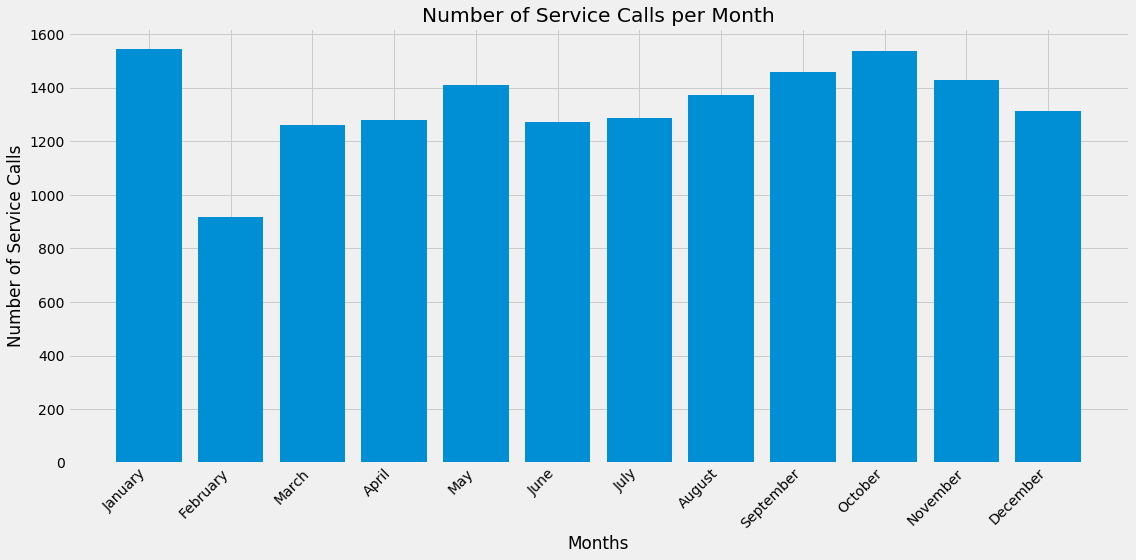

In [35]:
plt.figure(figsize=[16, 8])
plt.bar(months['month'], months['service_request_id'], align='center')
plt.title('Number of Service Calls per Month')
plt.xlabel('Months')
plt.ylabel('Number of Service Calls')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

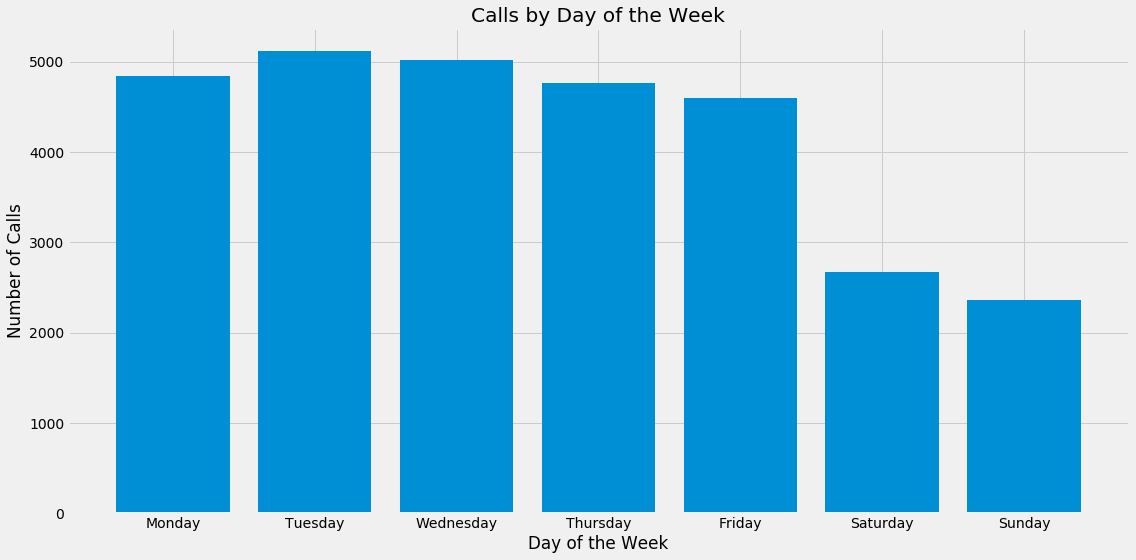

In [36]:
plt.figure(figsize=[16, 8])
plt.bar(weekdays['weekday'], weekdays['service_request_id'], align='center')
plt.title('Calls by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Calls')
plt.tight_layout()

## Bar graphs to compare population and call from each zip code

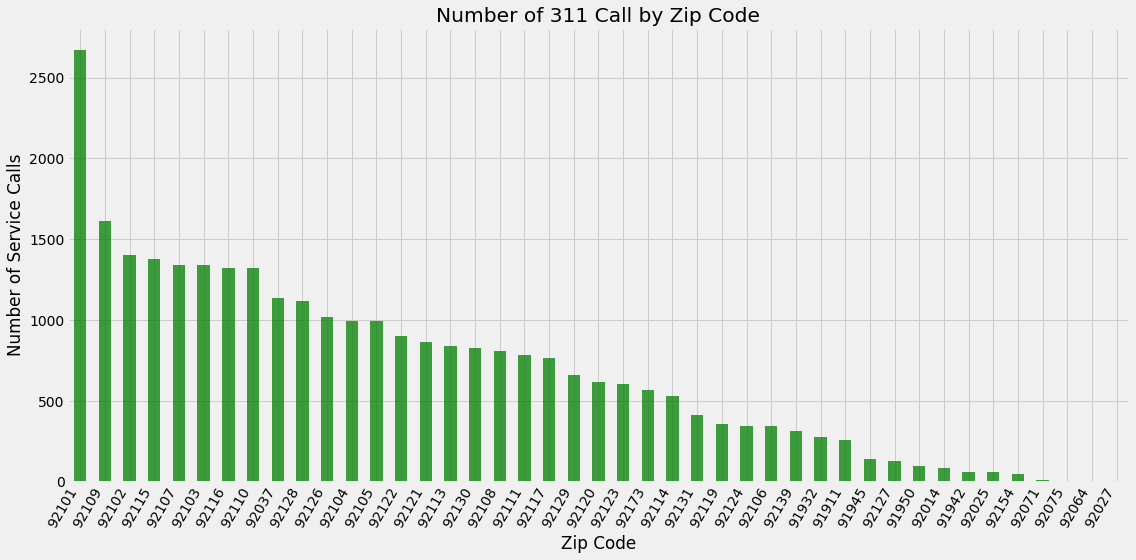

In [57]:
fig, ax = plt.subplots(figsize=[16, 8])
zip_service_plt = zip_service.plot(kind='bar', color='green',alpha =0.75)
plt.xlabel('Zip Code')
plt.ylabel('Number of Service Calls')
plt.title('Number of 311 Call by Zip Code')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()

## Heat maps to Compare volume of calls from around the city

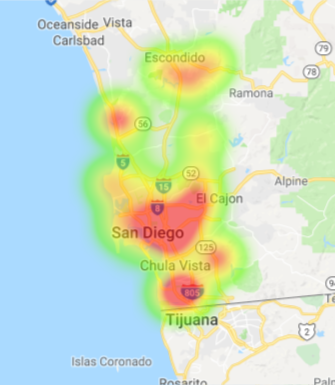

In [6]:
Image('../figures/heatmap.PNG', width=400)

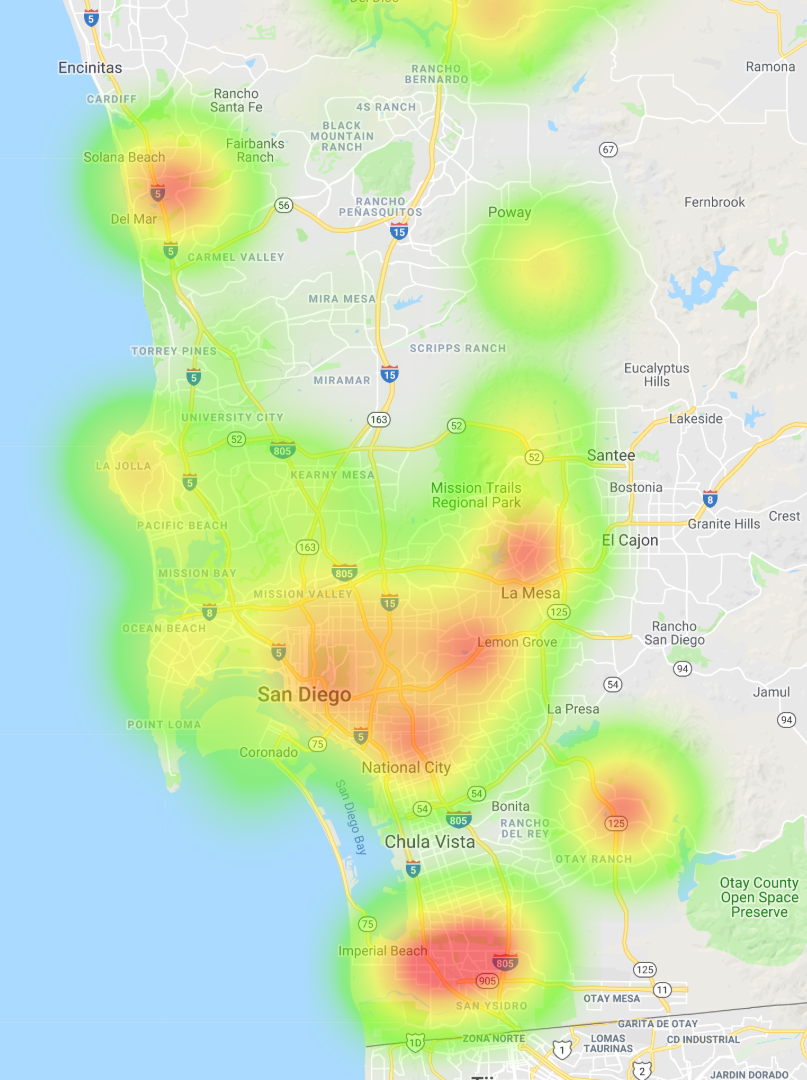

In [7]:
Image('../figures/heatmap_2.PNG', width=400)

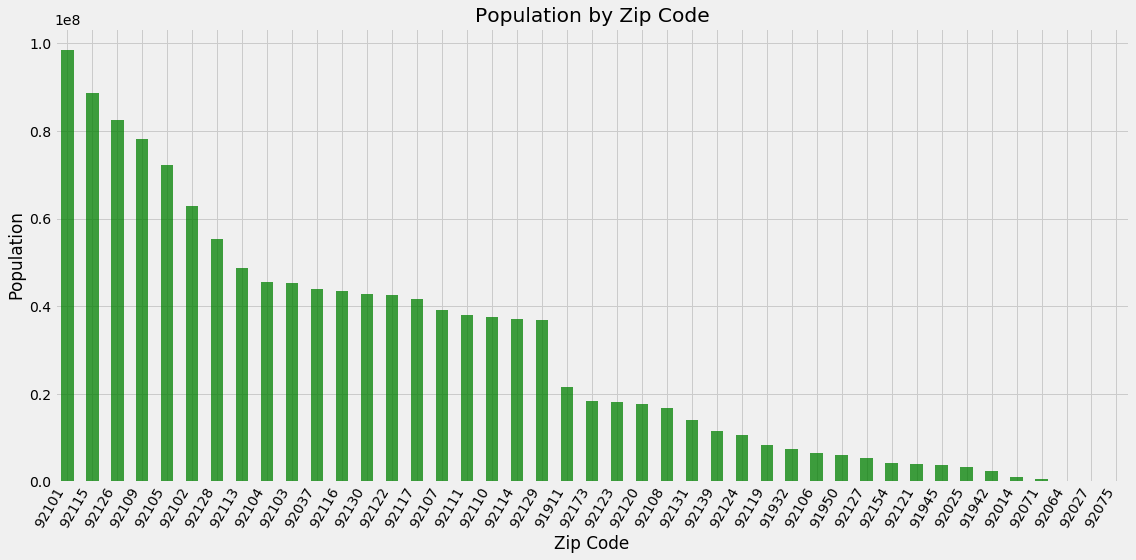

In [56]:
zip_population = df.groupby('zip_code')['total population'].sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=[16, 8])
zip_pop_plt = zip_population.plot(kind='bar', color='green',alpha =0.75)
plt.xlabel('Zip Code')
plt.ylabel('Population')
plt.title('Population by Zip Code')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()

## Scatter plot comparing population and call volume per zip code

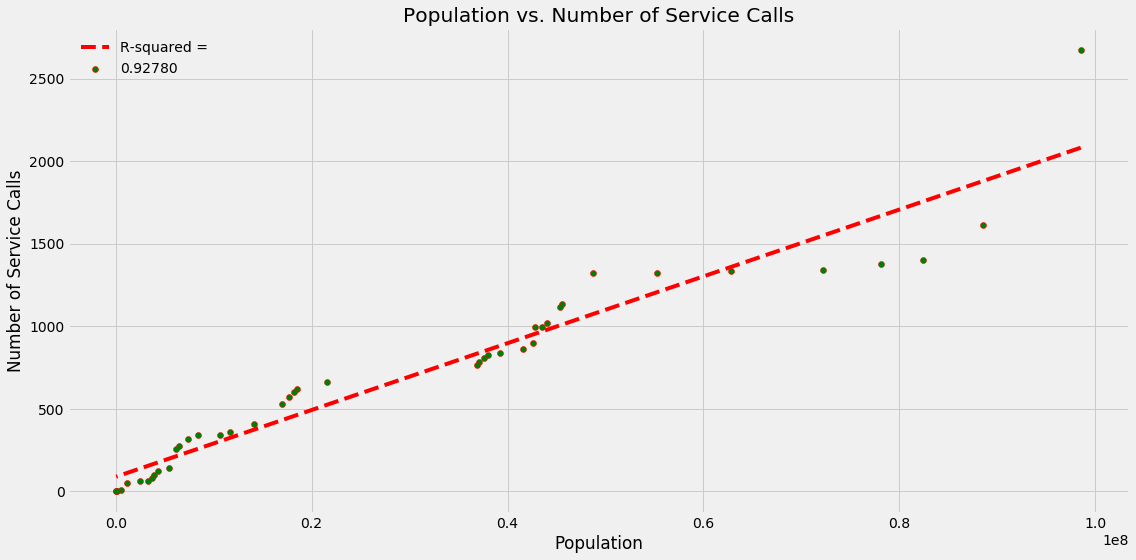

In [67]:
slope, intercept, r_value, p_value,_ = linregress(zip_population, zip_service)
fit = slope * zip_population + intercept
plt.figure(figsize=[16, 8])
plt.scatter(zip_population,zip_service,color='green', edgecolor='r')
plt.plot(zip_population, fit, color='red', linestyle='dashed')
plt.legend(('R-squared = '.format(),'{0:.5f}'.format(r_value**2)),loc='upper left', frameon=False)
plt.xlabel("Population")
plt.ylabel("Number of Service Calls")
plt.title("Population vs. Number of Service Calls")
plt.tight_layout()

## Bar graphs to show number of requests by category 

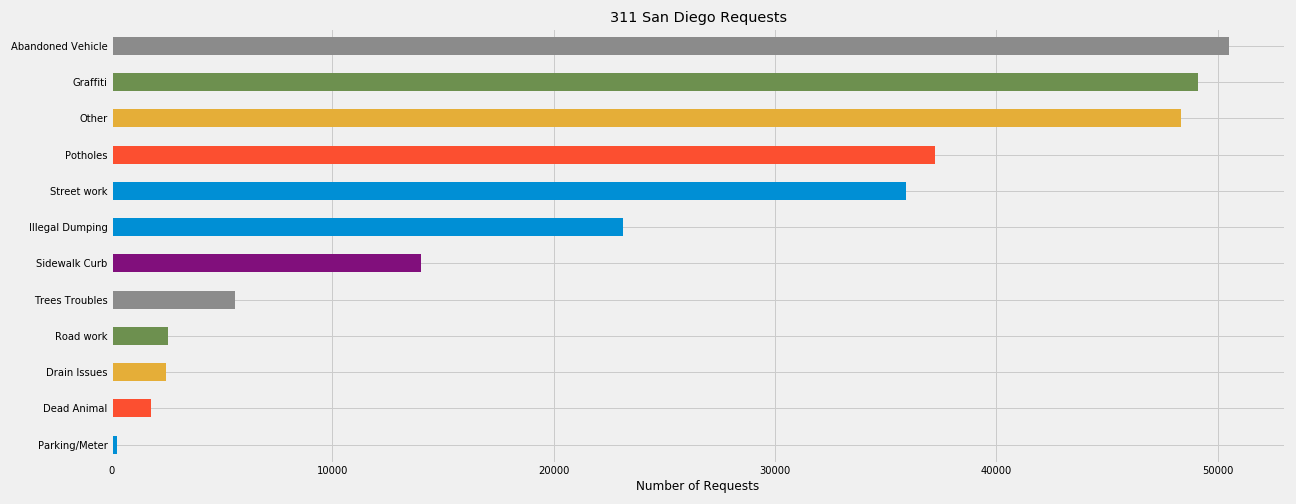

In [58]:
Image('../figures/311_San_Diego_Requests_category.png')

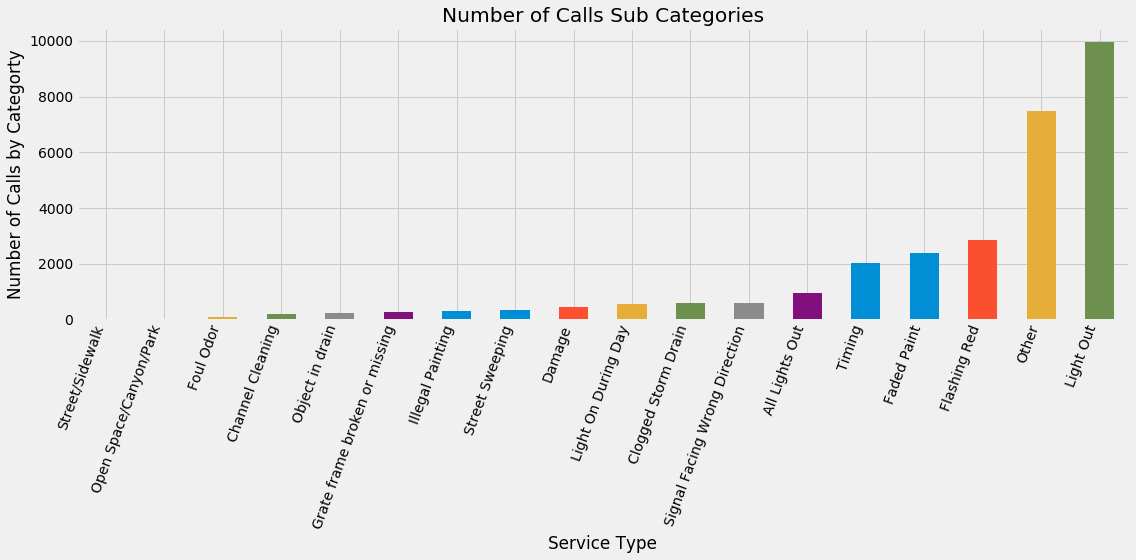

In [38]:
service = df.groupby('service_subtype')['service_request_id'].count().sort_values().tail(20)
fig, ax = plt.subplots(figsize=[16, 8])
service.plot.bar()
plt.title('Number of Calls Sub Categories')
plt.xlabel('Service Type')
plt.ylabel('Number of Calls by Categorty')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()

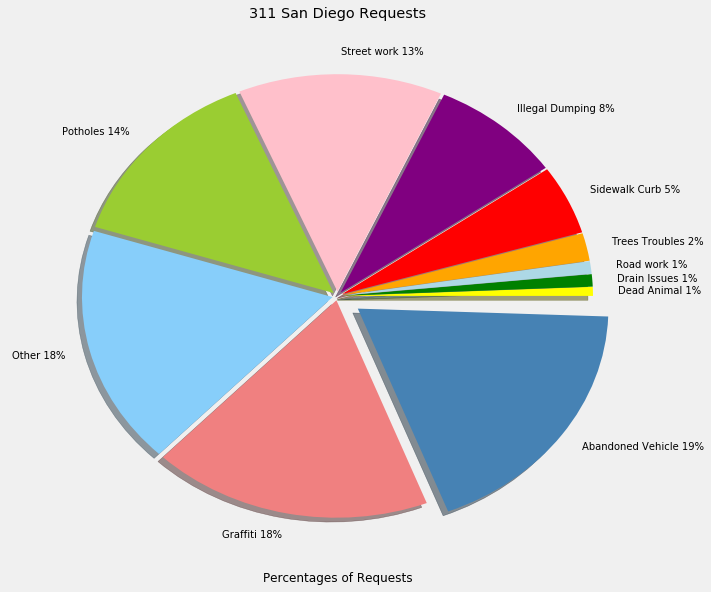

In [50]:
Image('../figures/percentages_of_requests_pie.png')

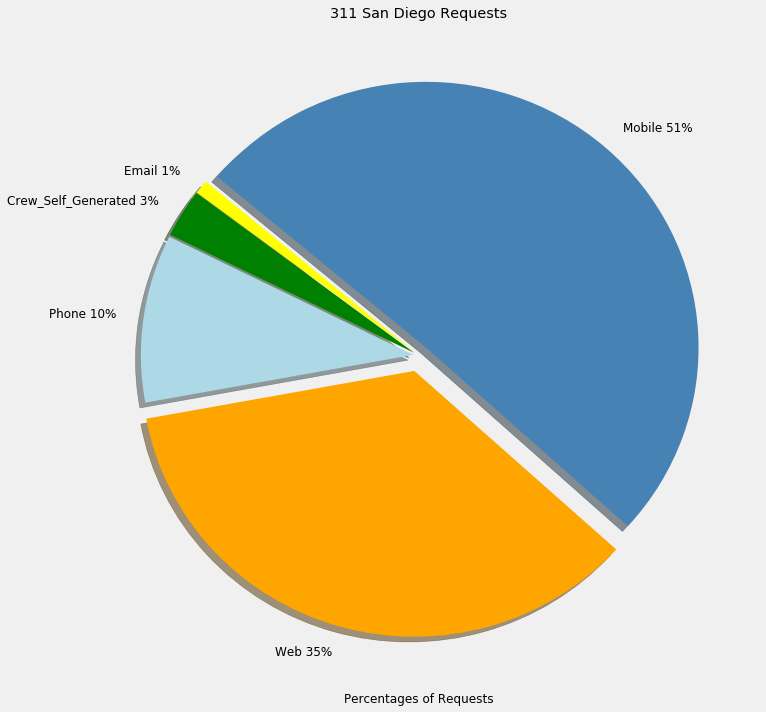

In [52]:
Image('../figures/311_San_Diego_Requests_sources_percentages.png', width=400)

## Binned based on Quartiles

In [39]:
med_income['Median income'].describe()

count        43.00
mean     72,637.67
std      25,678.18
min      31,001.00
25%      56,001.50
50%      66,297.00
75%      87,640.50
max     136,855.00
Name: Median income, dtype: float64

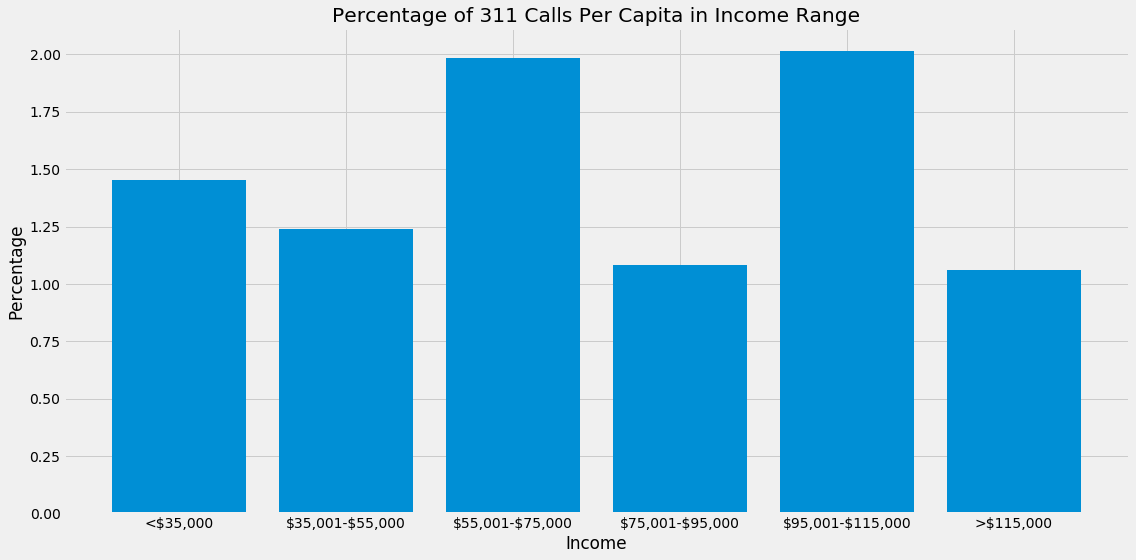

In [40]:
plt.figure(figsize=[16, 8])
plt.bar(call_count['income_ranges'], call_count['caller percentage'])
plt.xticks()
plt.title('Percentage of 311 Calls Per Capita in Income Range')
plt.xlabel('Income')
plt.ylabel('Percentage')
plt.tight_layout()

## In Conclusion
* Tuesday is the day with the most calls.
* January is the month with the most calls.
* The 92101 makes the most calls. Or the area that includes Airport, harbor Island, Main part of Downtown, and Bankers * Hill and has the most population.
* As we expected the most number of service calls came from the highest populated area
* Weather makes no difference to amount of calls.
* Highest subtype is a street light is out because most noticeable